In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mygene import MyGeneInfo
from IPython.display import Image, display

In [49]:

cDC1_diffbind_results_fold_change = pd.read_csv(
    "cDC1_diffbind_samplesheet_diffbind_results.csv", header=0
)
cDC2_diffbind_results_fold_change = pd.read_csv(
    "cDC2_diffbind_samplesheet_diffbind_results.csv", header=0
)
cDC1_normalized_RNA_fold_change = pd.read_csv(
    "GSE266583_cDC1_Norm_counts.tsv", sep="\t", header=0
)
cDC2_normalized_RNA_fold_change = pd.read_csv(
    "GSE266583_cDC2_Norm_counts.tsv", sep="\t", header=0
)
cDC1_annotated_peaks = pd.read_csv(
    "annotated_cDC1_diffbind_samplesheet_peaks.txt", sep="\t", header=0
)
cDC2_annotated_peaks = pd.read_csv(
    "annotated_cDC2_diffbind_samplesheet_peaks.txt", sep="\t", header=0
)

In [50]:
cDC1_diffbind_results_fold_change

,seqnames,start,end,Fold,p.value,FDR
0,chr7,19749631,19750031,0.004110,7.113860e-07,0.017194
1,chr16,97464965,97465365,0.002703,8.242144e-07,0.017194
2,chr12,108333945,108334345,0.004902,8.844228e-07,0.017194
3,chr11,108920129,108920529,0.003688,1.438763e-06,0.019971
4,chr17,28350631,28351031,0.002571,2.417937e-06,0.019971
...,...,...,...,...,...,...
511,chr10,86498689,86499089,0.001634,9.925711e-03,0.997858
512,chr7,4971606,4972006,0.001149,9.928751e-03,0.997858
513,chr7,55855572,55855972,-0.001780,9.960942e-03,0.997858
514,chr11,114747712,114748112,0.001994,9.961835e-03,0.997858


In [57]:
sample_groups_cdc1 = { 'a157': 'WT_1', 'a160': 'WT_2', 'a163': 'WT_3', 'a166': 'KO_1', 'a169': 'KO_2', 'a172': 'KO_3' }
cDC1_normalized_RNA_fold_change.rename(columns=sample_groups_cdc1, inplace=True)
cDC1_normalized_RNA_fold_change

,gene_id,WT_1,WT_2,WT_3,KO_1,KO_2,KO_3,WT_mean,KO_mean,log2FC_RNA
0,Gnai3,3309.553304,3911.219771,3607.775869,3774.012744,3628.462605,3892.361316,3609.516315,3764.945555,0.060807
1,Cdc45,3541.693765,4572.668641,2950.262706,5017.822770,3564.581221,1941.290757,3688.208371,3507.898249,-0.072293
2,Scml2,8.689750,7.058143,7.976763,0.000000,6.879534,5.588458,7.908219,4.155997,-0.788885
3,Narf,628.144776,693.714669,970.885989,711.031527,670.263136,688.777505,764.248478,690.024056,-0.147192
4,Cav2,24.827857,38.315636,22.790751,34.660311,40.294411,94.305236,28.644748,56.419986,0.953776
...,...,...,...,...,...,...,...,...,...,...
17012,A930007A09Rik,40.965964,41.340554,45.581502,30.699133,34.397668,63.568715,42.629340,42.888505,0.008544
17013,Gm7592,497.798528,386.181277,397.698603,659.536208,697.781270,799.848117,427.226136,719.055198,0.749735
17014,Ccl19-ps2,377.383423,440.629812,128.767743,433.749038,289.923204,252.877745,315.593659,325.516662,0.044524
17015,Gm21104,377.383423,440.629812,128.767743,433.749038,289.923204,252.877745,315.593659,325.516662,0.044524


In [59]:
sample_groups_cdc2 = { 'a158': 'WT_1', 'a161': 'WT_2', 'a165': 'WT_3', 'a167': 'KO_1', 'a170': 'KO_2', 'a173': 'KO_3' }
cDC2_normalized_RNA_fold_change.rename(columns=sample_groups_cdc2, inplace=True)
cDC2_normalized_RNA_fold_change

,gene_id,WT_1,WT_2,WT_3,KO_1,KO_2,KO_3
0,Gnai3,3107.559994,2904.207467,2979.827352,3369.626332,3172.235183,2852.512725
1,Cdc45,1488.198374,1486.549485,2093.819780,1455.788846,1414.341203,1324.673485
2,Scml2,1.008948,19.375736,7.313742,6.361787,15.660525,11.469035
3,Narf,1058.386505,744.889387,904.814336,851.419114,914.183172,910.969026
4,Cav2,67.599519,54.897917,65.823676,121.934244,88.090456,117.147995
...,...,...,...,...,...,...,...
16301,A930007A09Rik,37.331078,43.057190,39.703169,61.497271,46.981576,40.960838
16302,Gm7592,483.286116,344.457520,322.849457,303.245164,360.192085,305.567848
16303,Ccl19-ps2,40.357922,83.961521,40.747990,106.029778,53.833056,80.283242
16304,Gm21104,40.357922,83.961521,40.747990,106.029778,53.833056,80.283242


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
29 input query terms found no hit:	['ENSMUSG00000084512', 'ENSMUSG00000045506', 'ENSMUSG00000088428', 'ENSMUSG00000095386', 'ENSMUSG000


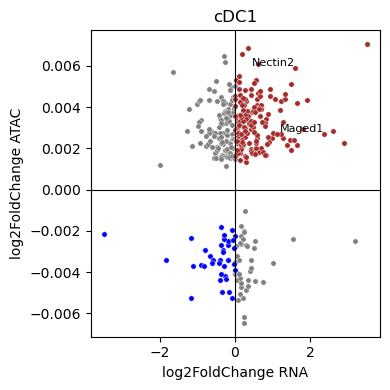

In [85]:
def plot_rna_atac_scatter(
    rna_df, 
    diffbind_df, 
    anno_df, 
    gene_label_list, 
    title='cDC1',
    species='mouse'
):
    #  Compute RNA fold changes
    rna_df['WT_mean'] = rna_df[['WT_1', 'WT_2', 'WT_3']].mean(axis=1)
    rna_df['KO_mean'] = rna_df[['KO_1', 'KO_2', 'KO_3']].mean(axis=1)
    rna_df['log2FC_RNA'] = np.log2((rna_df['KO_mean']+1) / (rna_df['WT_mean']+1))
    
    #  Annotate ATAC-seq peaks
    full_anno = pd.merge(
        diffbind_df, 
        anno_df, 
        left_on=['seqnames', 'start', 'end'], 
        right_on=['Chr', 'Start', 'End'],
        how='inner'
    )
    full_anno['log2FC_ATAC'] = np.log2(full_anno['Fold']+1)
   
    
    #  Map Ensembl IDs to gene symbols
    mg = MyGeneInfo()
    ensembl_ids = full_anno['Gene Name'].dropna().unique().tolist()
    results = mg.querymany(
        ensembl_ids,
        scopes='ensembl.gene',
        fields='symbol',
        species=species
    )
    ensembl2symbol = {r['query']: r['symbol'] for r in results if 'symbol' in r}
    full_anno['Gene_Symbol'] = full_anno['Gene Name'].map(ensembl2symbol)
    gene_list = full_anno['Gene_Symbol'].dropna().unique().tolist()
    filtered_gene_list = [
    g for g in gene_list
    if (
        'Rik' not in g and
        'orf' not in g.lower() and  # case-insensitive
        '/' not in g
    )
]
    
    # Summarize ATAC fold change per gene symbol
    atac_fc_gene = full_anno.groupby('Gene_Symbol')['log2FC_ATAC'].mean().reset_index()
    
    #  Merge RNA and ATAC by gene symbol
    scatter = pd.merge(
        rna_df,
        atac_fc_gene,
        left_on='gene_id',
        right_on='Gene_Symbol'
    )
    scatter = scatter[['gene_id', 'log2FC_RNA', 'log2FC_ATAC']]
    
    # Scatter plot
    plt.figure(figsize=(4,4))
    ax = sns.scatterplot(data=scatter, x="log2FC_RNA", y="log2FC_ATAC", color='grey', s=15)

    # Quadrant coloring
    up_both = scatter[(scatter["log2FC_RNA"] > 0) & (scatter["log2FC_ATAC"] > 0)]
    down_both = scatter[(scatter["log2FC_RNA"] < 0) & (scatter["log2FC_ATAC"] < 0)]
    sns.scatterplot(data=up_both, x="log2FC_RNA", y="log2FC_ATAC", color='brown', ax=ax, s=15)
    sns.scatterplot(data=down_both, x="log2FC_RNA", y="log2FC_ATAC", color='blue', ax=ax, s=15)

    # Gene labeling
    for label in gene_label_list:
        row = scatter[scatter['gene_id'] == label]
        if not row.empty:
            plt.text(row['log2FC_RNA'].values[0], row['log2FC_ATAC'].values[0], label,
                     fontsize=8, color='black', ha='right', va='bottom')

    plt.axhline(0, color='black', lw=0.8)
    plt.axvline(0, color='black', lw=0.8)
    plt.xlabel('log2FoldChange RNA')
    plt.ylabel('log2FoldChange ATAC')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return scatter,filtered_gene_list


gene_labels_cdc1 = ['Nectin2', 'Il3ra1', 'Nfil3', 'Cd8a', 'Maged1'] 
scatter_cdc1,gene_list_cdc1 = plot_rna_atac_scatter(cDC1_normalized_RNA_fold_change, cDC1_diffbind_results_fold_change, cDC1_annotated_peaks, gene_labels_cdc1)


In [88]:
gene_list_cdc1
with open('enrichr_gene_list_cdc1.txt', 'w') as f:
    f.write('\n'.join(gene_list_cdc1))

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
14 input query terms found no hit:	['ENSMUSG00000093214', 'ENSMUSG00000094780', 'ENSMUSG00000084472', 'ENSMUSG00000095674', 'ENSMUSG000


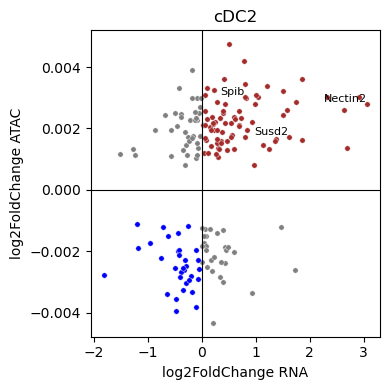

In [87]:
gene_labels_cdc2 = ['Spib', 'Irf8', 'Susd2', 'Nectin2', 'Csf3r'] 
scatter_cdc2, gene_list_cdc2 = plot_rna_atac_scatter(cDC2_normalized_RNA_fold_change, cDC2_diffbind_results_fold_change, cDC2_annotated_peaks, gene_labels_cdc2,title='cDC2')

In [90]:
with open('enrichr_gene_list_cdc2.txt', 'w') as f:
    f.write('\n'.join(gene_list_cdc2))

# Enriched cell types against CellMarker Augmented 2021 for cDC1

| Index | Name                                         | P-value     | Adjusted p-value | Odds Ratio | Combined score |
|-------|----------------------------------------------|-------------|------------------|------------|----------------|
| 1     | Osteogenic Precursor-Like cell:Dermis        | 0.000002304 | 0.0009548        | 6.12       | 79.43          |
| 2     | Stem cell:Gastrointestinal Tract             | 0.000002560 | 0.0009548        | 6.05       | 77.91          |
| 3     | Mesenchymal Stem cell:Brown Adipose Tissue   | 0.00001555  | 0.003866         | 5.47       | 60.59          |
| 4     | Colonic Stem cell:Colon                      | 0.00006644  | 0.01080          | 5.08       | 48.82          |
| 5     | Gastric Stem cell:Gastric Corpus             | 0.00007240  | 0.01080          | 5.02       | 47.85          |
| 6     | Microglial cell:Brain                        | 0.0001235   | 0.01535          | 12.45      | 112.04         |
| 7     | Regulatory T (Treg) cell:Liver               | 0.0001590   | 0.01694          | 2.55       | 22.28          |
| 8     | Pluripotent Stem cell:Skin                   | 0.0002924   | 0.02727          | 4.61       | 37.51          |
| 9     | Oogenesis Phase Fetal Germ cell:Fetal Gonad  | 0.0005594   | 0.04637          | 1.93       | 14.48          |
| 10    | Corneal Endothelial cell:Corneal Endothelium | 0.001561    | 0.07303          | 3.95       | 25.54          |


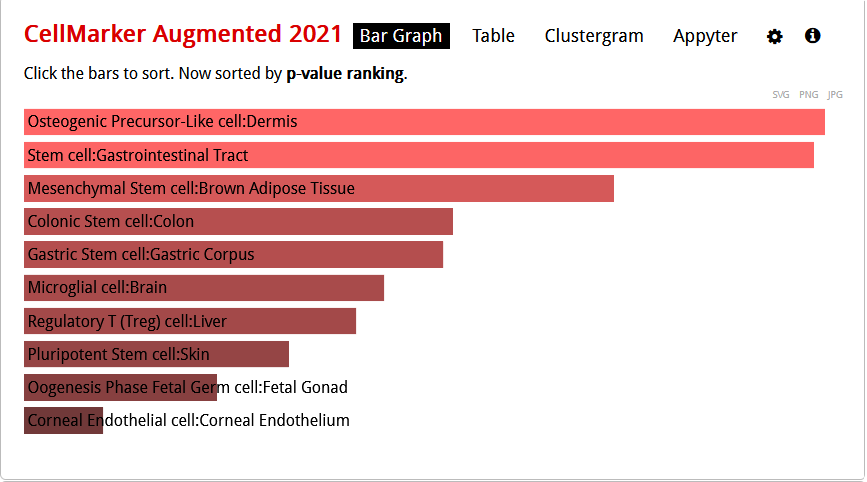

In [93]:
display(Image(filename="cellmarker_augmented_2021_cdc1.png"))

# Enriched cell types against CellMarker Augmented 2021 for cDC2

| Index | Name                                                | P-value  | Adjusted p-value | Odds Ratio | Combined score |
|-------|-----------------------------------------------------|----------|------------------|------------|----------------|
| 1     | Gonadal Endothelial cell:Fetal Gonad                | 0.003532 | 0.7026           | 2.50       | 14.13          |
| 2     | Beige Adipogenic Precursor cell:Adipose Tissue      | 0.006896 | 0.7026           | 4.44       | 22.11          |
| 3     | Brown Adipogenic Precursor cell:Adipose Tissue      | 0.006896 | 0.7026           | 4.44       | 22.11          |
| 4     | Glutamatergic neuron:Dorsolateral Prefrontal Cortex | 0.006896 | 0.7026           | 4.44       | 22.11          |
| 5     | Ionocyte cell:Lung                                  | 0.008148 | 0.7026           | 2.72       | 13.11          |
| 6     | Mesenchymal cell:Ovary                              | 0.01168  | 0.7026           | 13.95      | 62.07          |
| 7     | Plasmacytoid Dendritic cell:Blood                   | 0.01865  | 0.7026           | 2.36       | 9.39           |
| 8     | Luteinizing Granulosa cell:Ovarian Follicle         | 0.02776  | 0.7026           | 3.65       | 13.10          |
| 9     | Stromal cell:Amniotic Membrane                      | 0.02776  | 0.7026           | 3.65       | 13.10          |
| 10    | Retinal Progenitor cell:Retina                      | 0.02869  | 0.7026           | 3.62       | 12.84          |


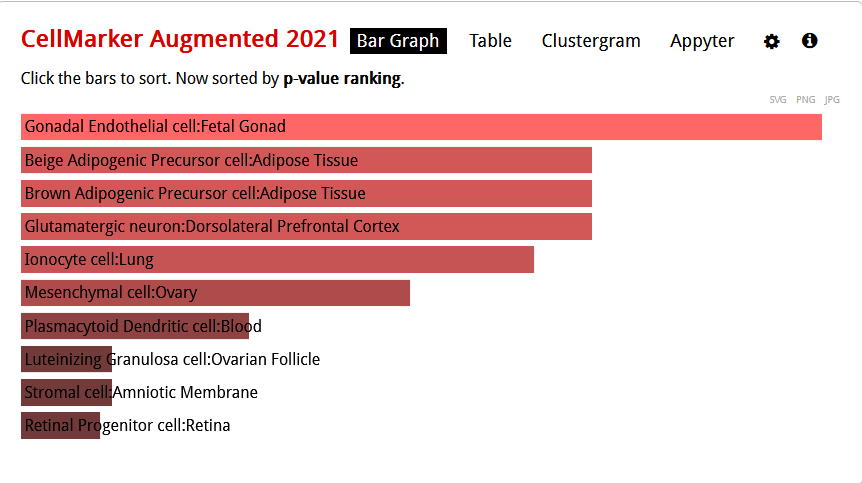

In [94]:
display(Image(filename="cellmarker_augmented_2021_cdc2.png"))

# TSS enrichment scores

| Sample      | TSS_enrichment |
|-------------|----------------|
| SRR28895188 | 13.27285       |
| SRR28895190 | 14.05926       |
| SRR28895185 | 11.61250       |
| SRR28895184 | 14.64938       |
| SRR28895183 | 13.09953       |
| SRR28895189 | 12.24426       |
| SRR28895187 | 12.53440       |
| SRR28895186 | 13.38898       |

# FRiP scores

| run         | FRiP |
|-------------|-------|
| SRR28895185 | .0196 |
| SRR28895186 | .0186 |
| SRR28895189 | .0270 |
| SRR28895190 | .0208 |
| SRR28895183 | .0257 |
| SRR28895187 | .0236 |
| SRR28895184 | .0251 |
| SRR28895188 | .0196 |



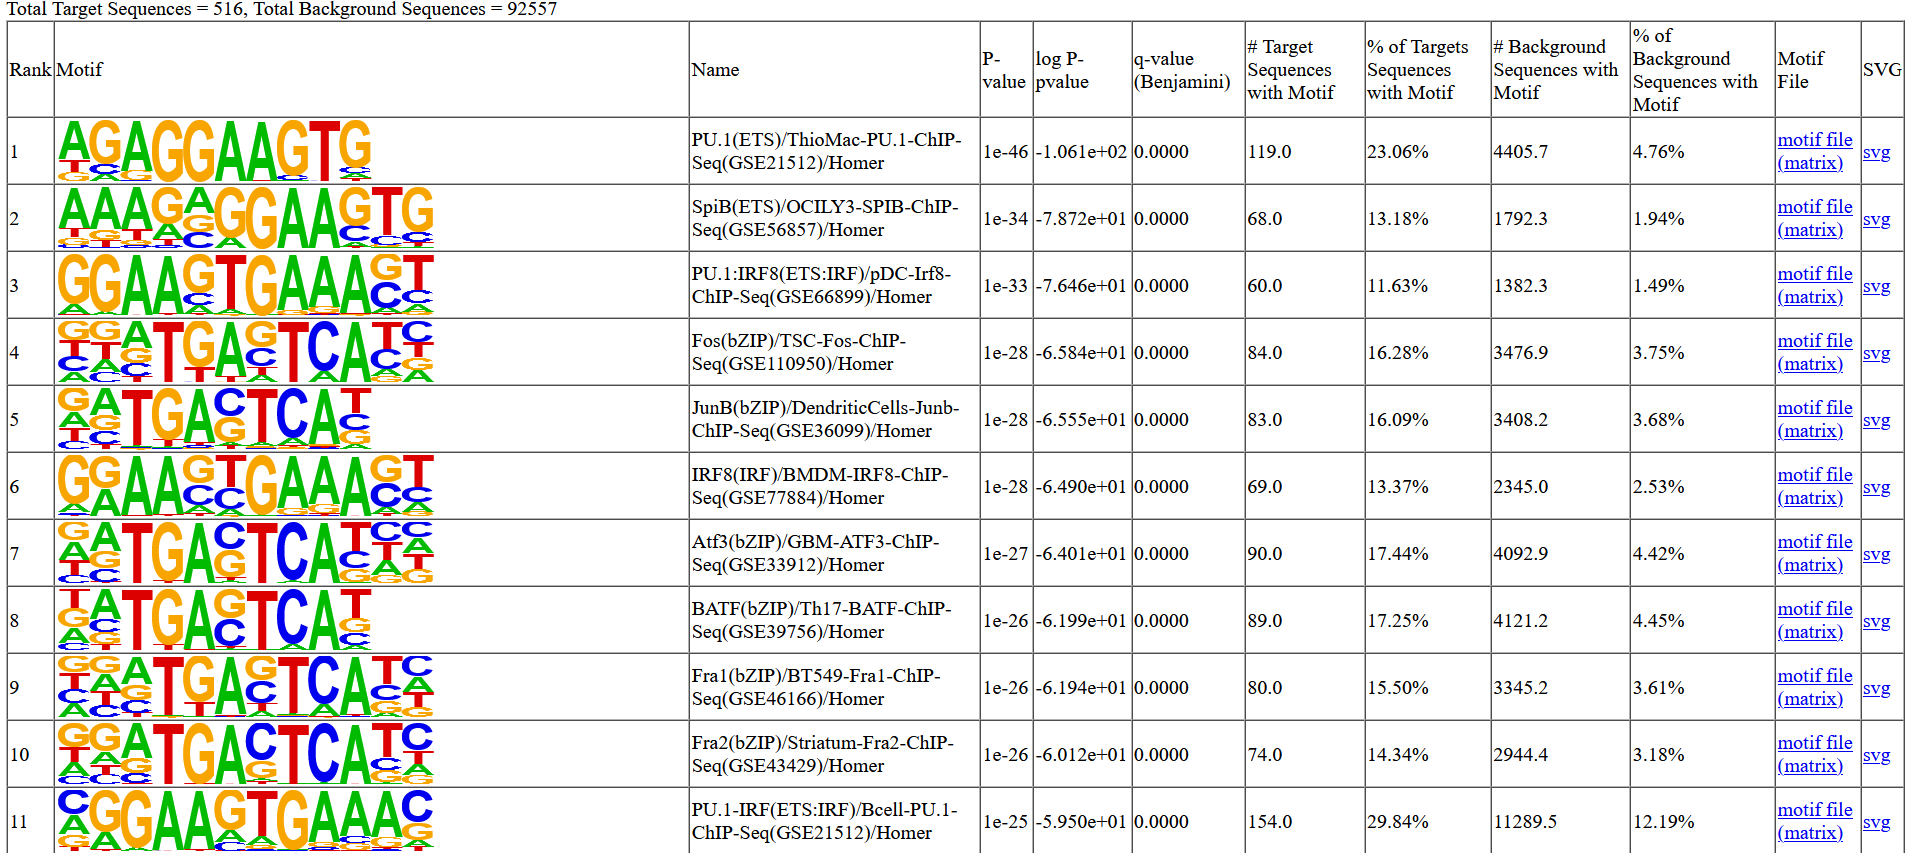

In [95]:
display(Image(filename="motifs_cdc1.png"))

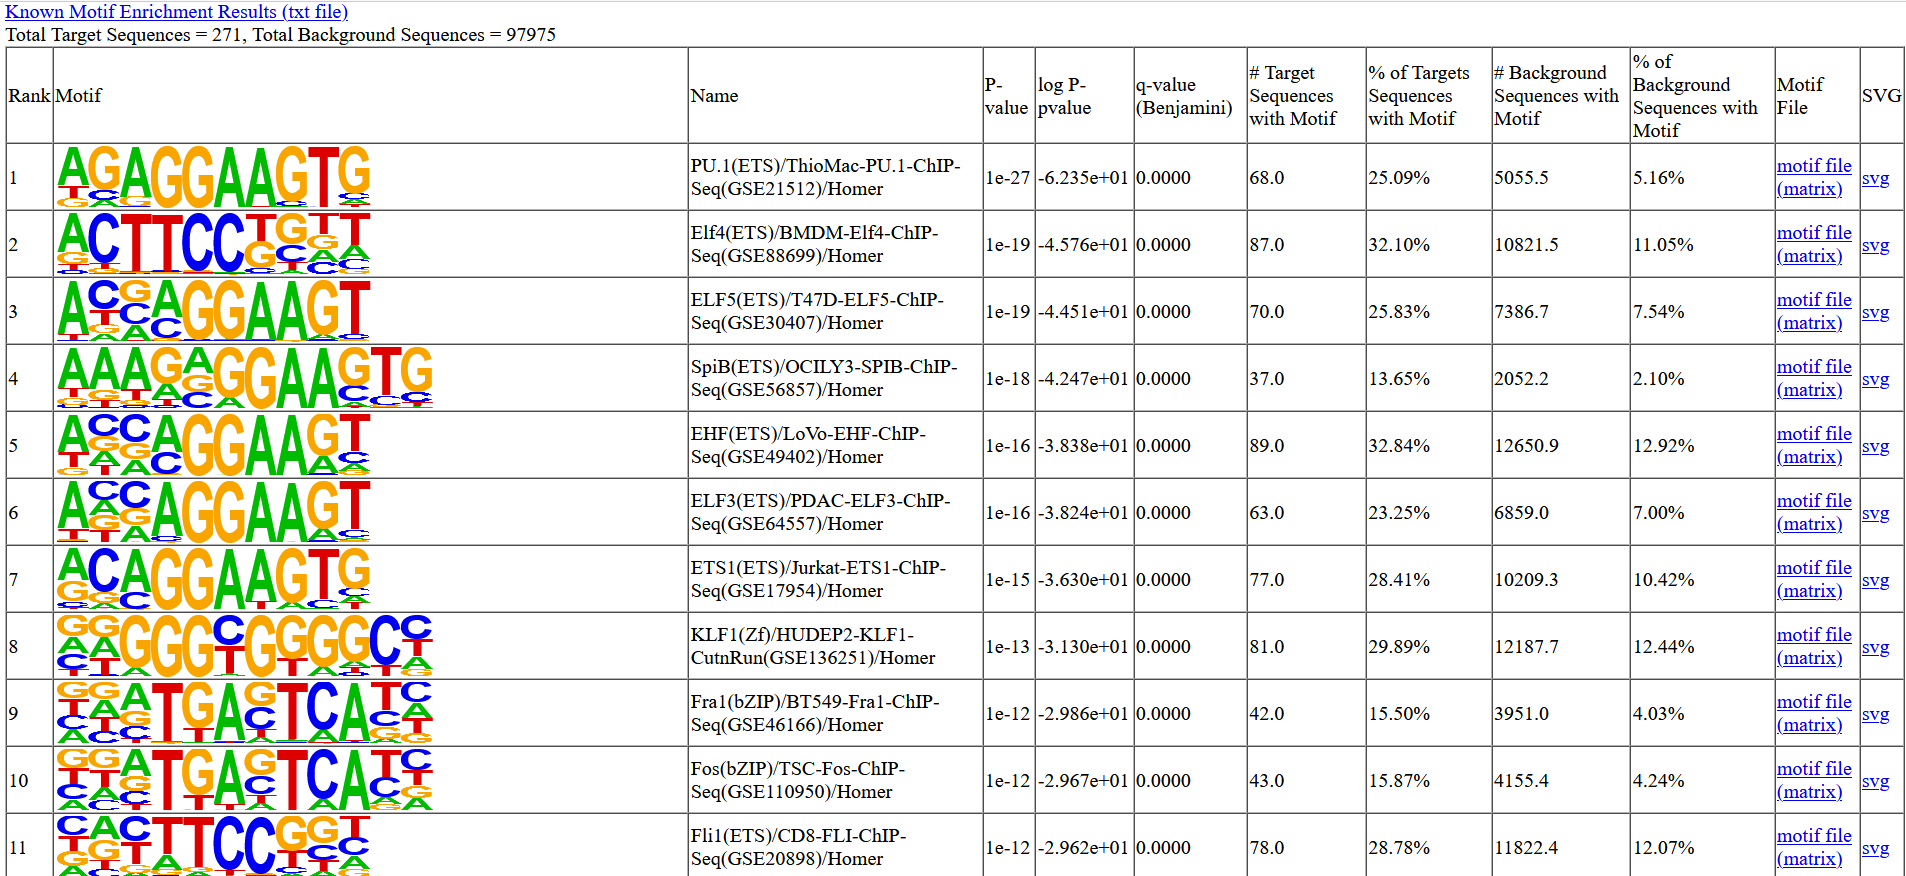

In [96]:
display(Image(filename="motifs_cdc2.png"))

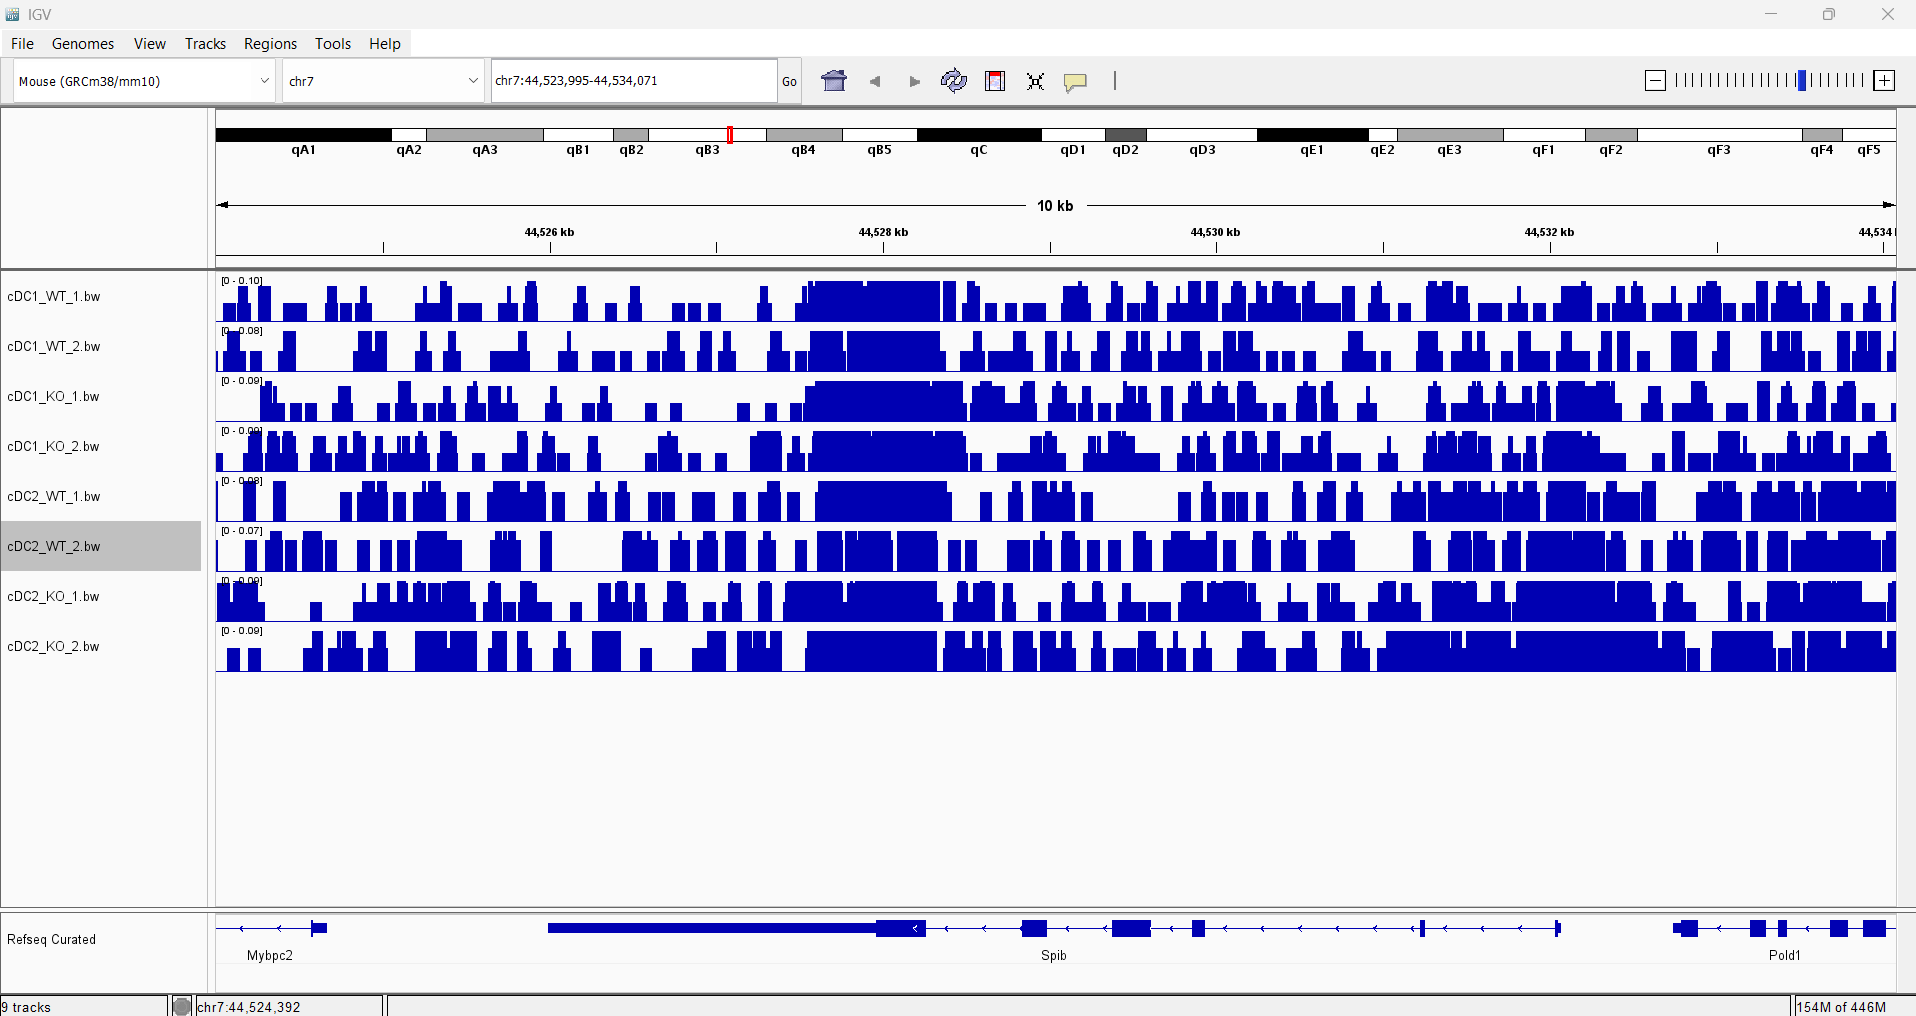

In [97]:
display(Image(filename="SpiB.png"))

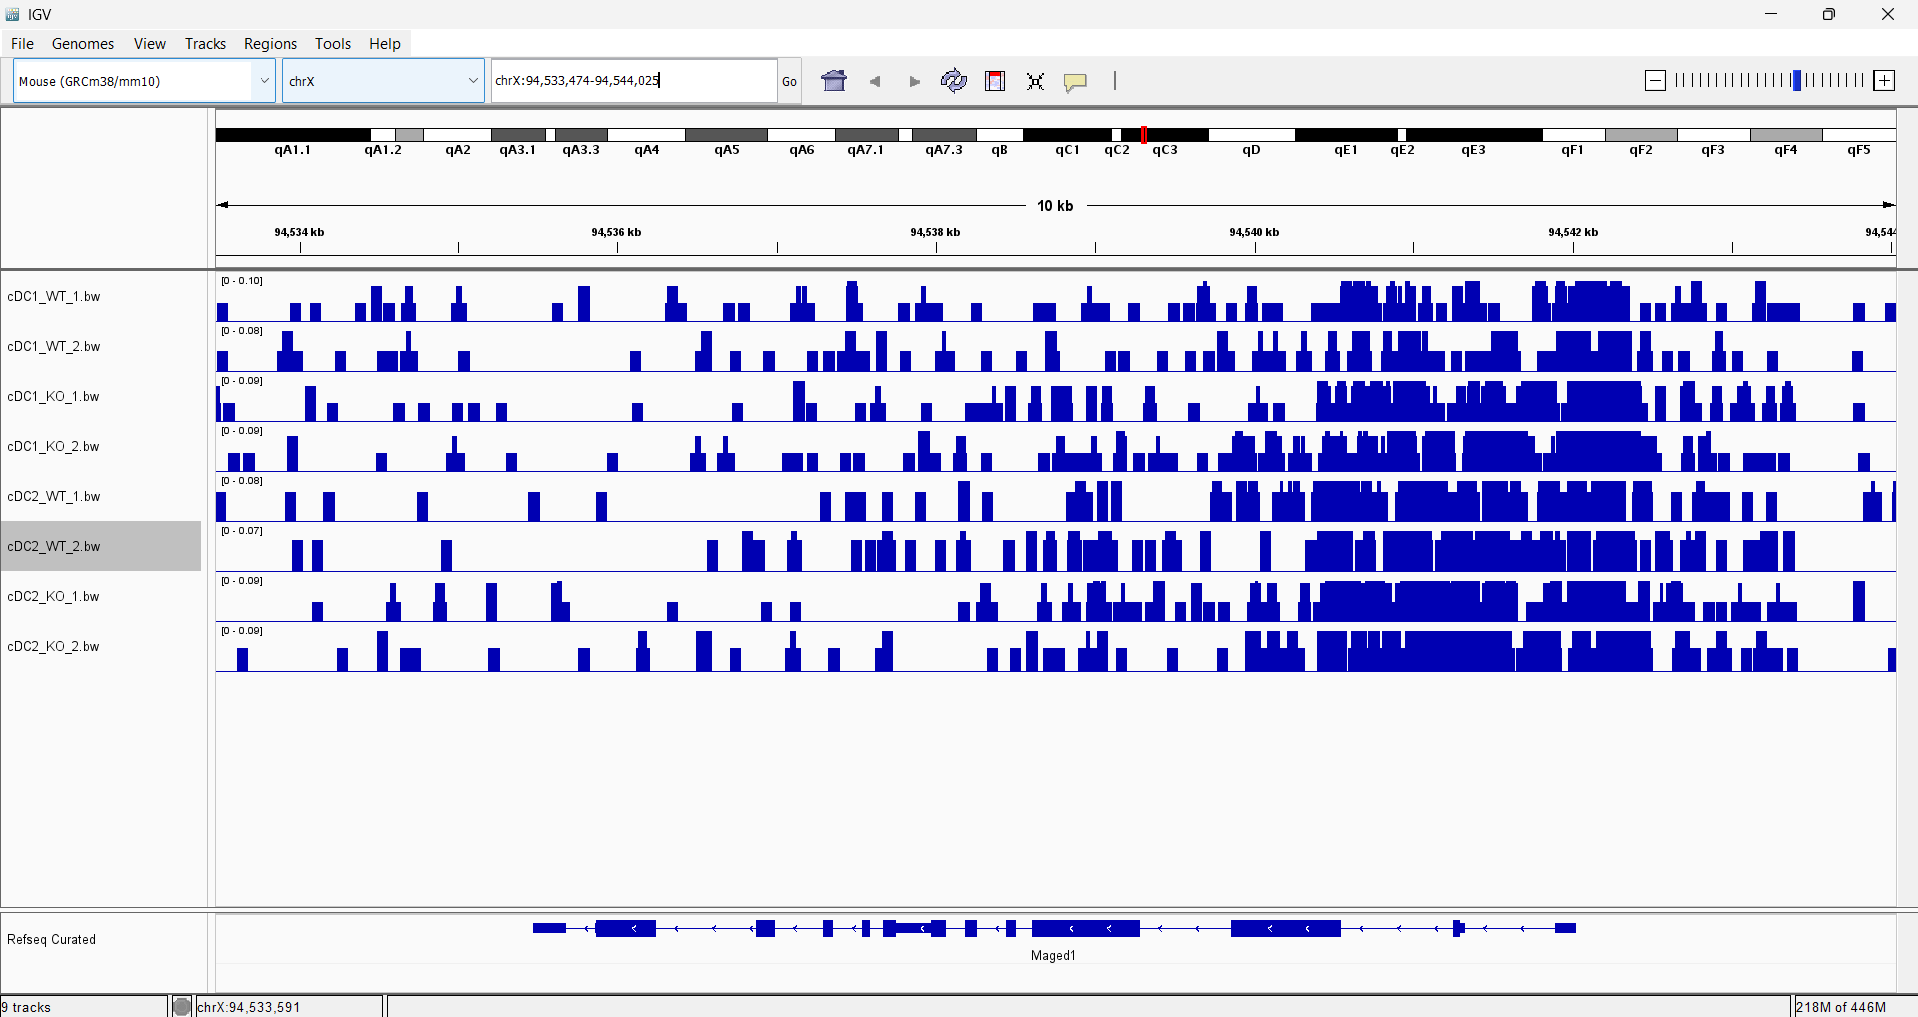

In [98]:
display(Image(filename="Maged1.png"))

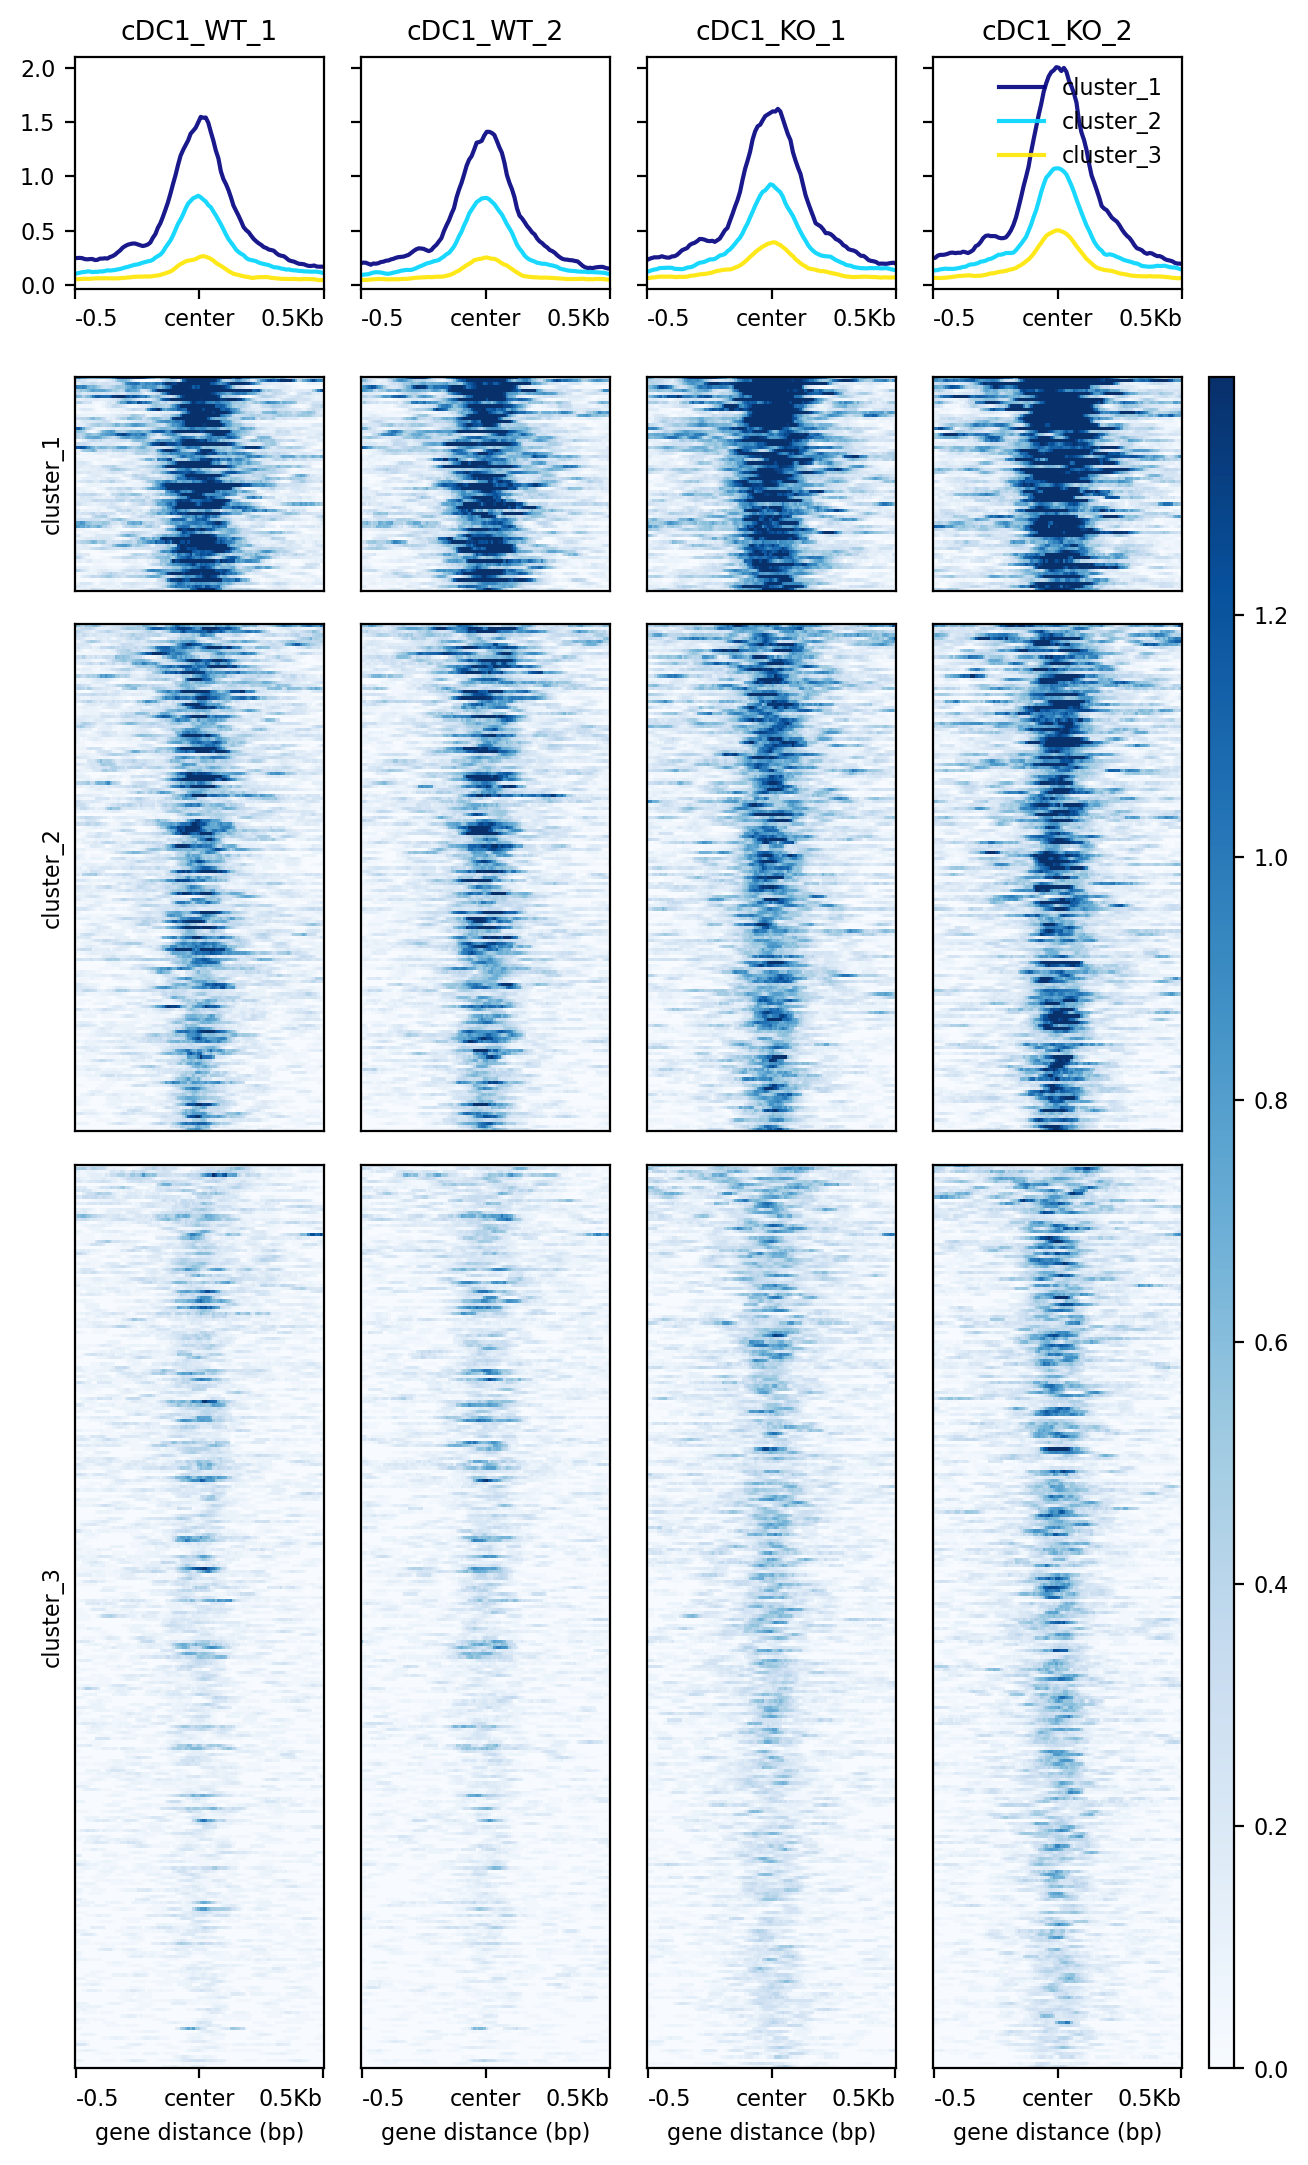

In [99]:
display(Image(filename="cDC1_diff_peaks_heatmap.png"))

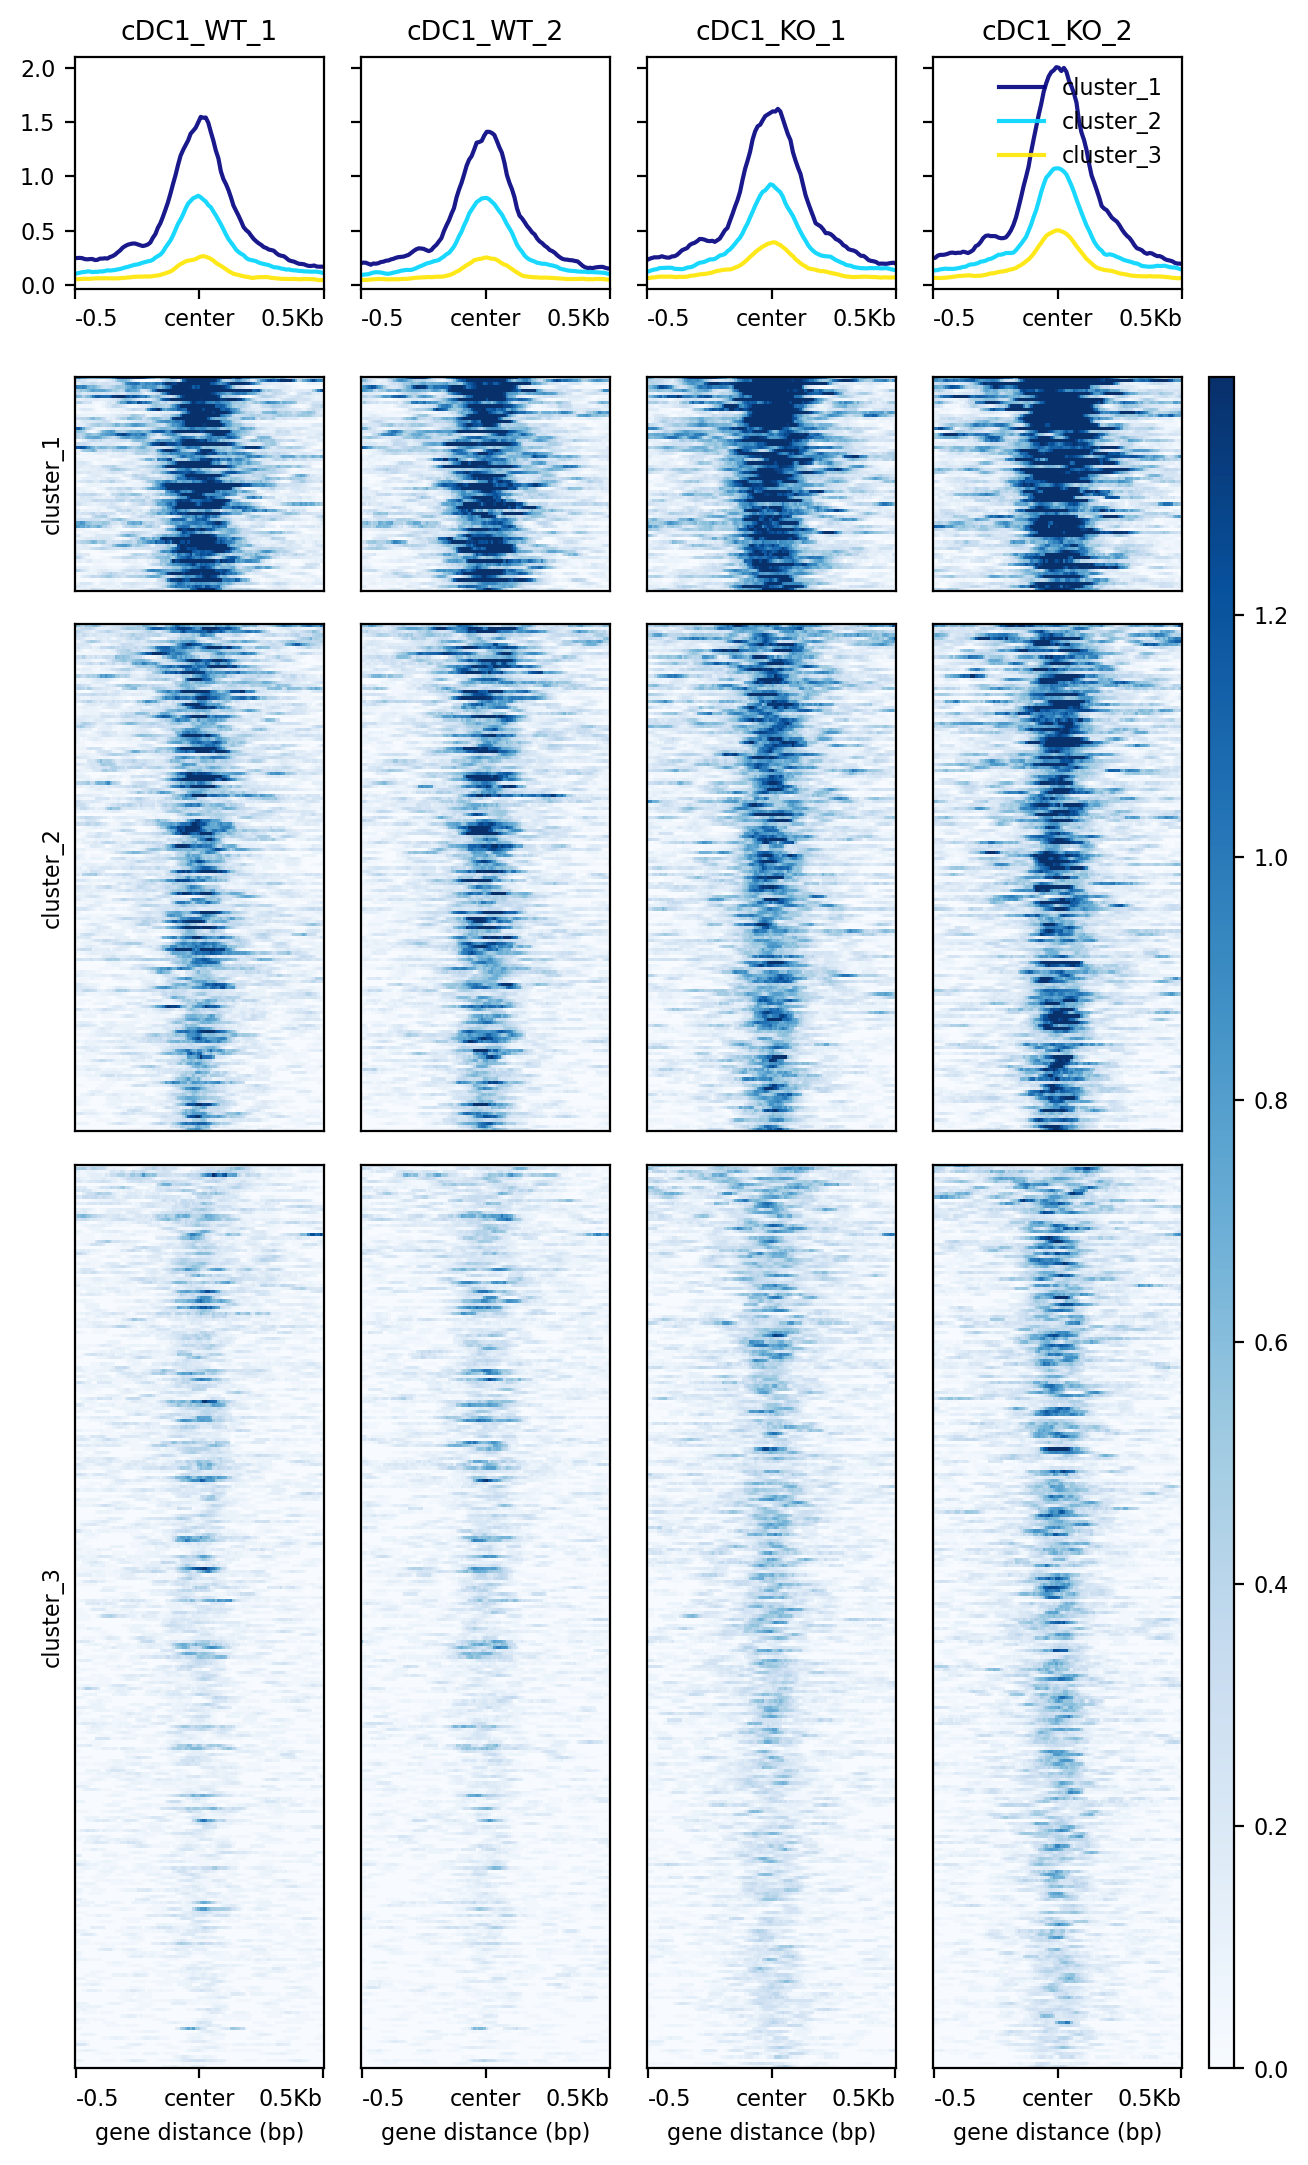

In [100]:
display(Image(filename="cDC2_diff_peaks_heatmap.png"))

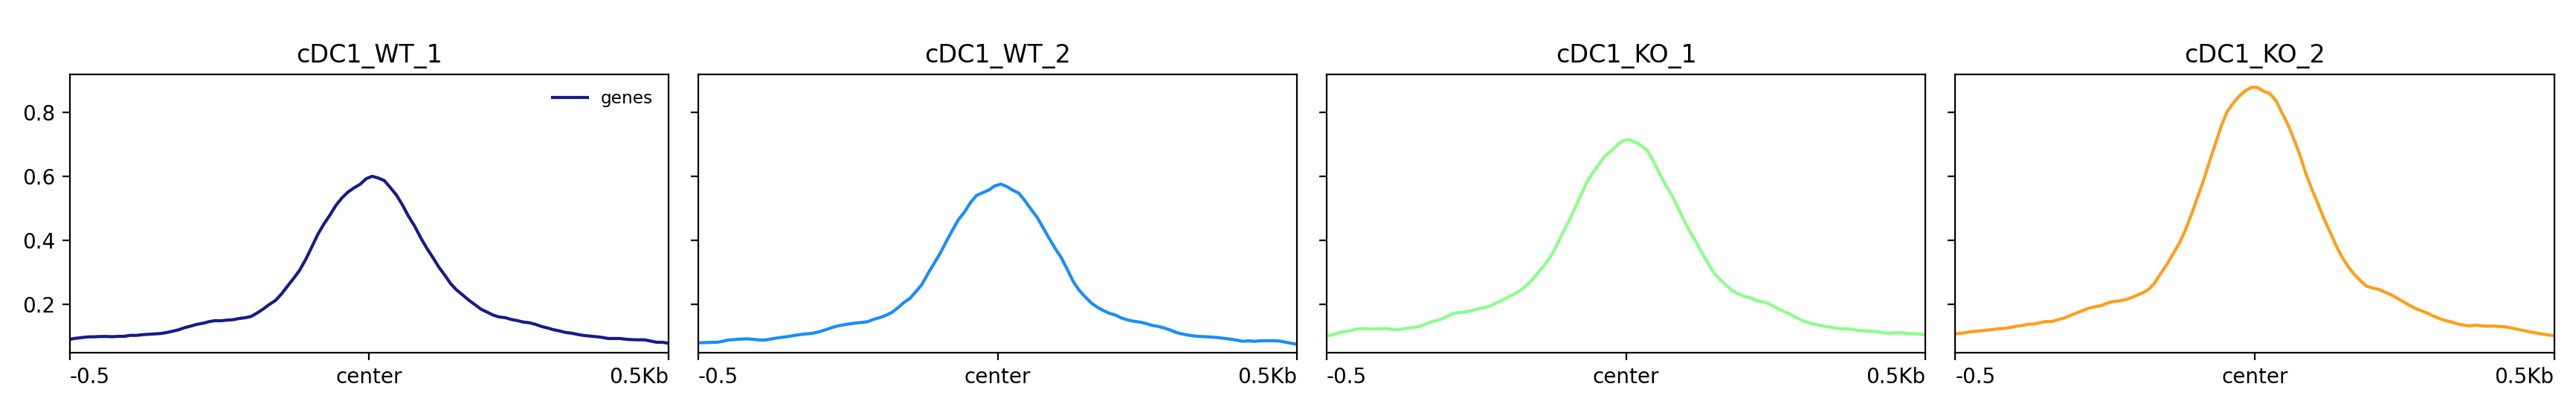

In [101]:
display(Image(filename="cDC1_signal_coverage.png"))

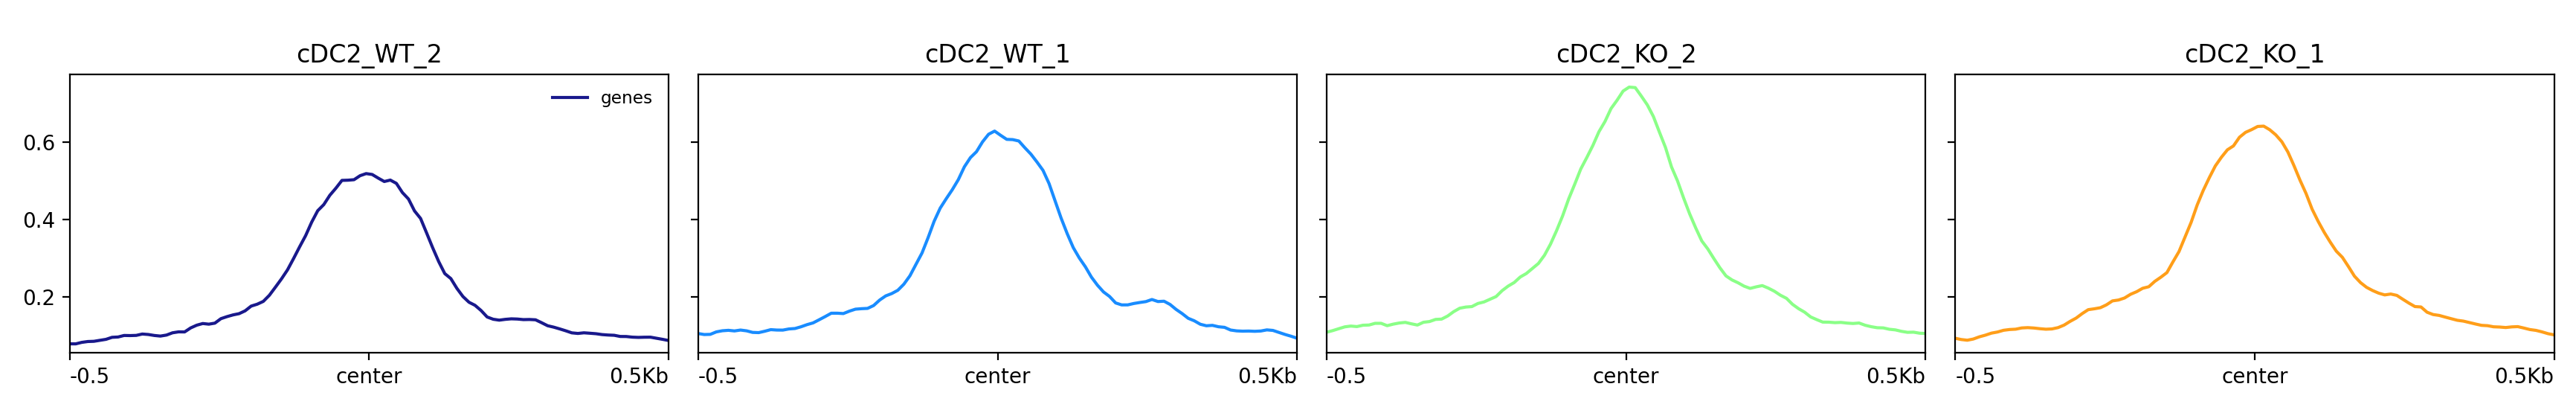

In [102]:
display(Image(filename="cDC2_signal_coverage.png"))